In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from fbprophet import Prophet

In [2]:
chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.



In [0]:
chicago_df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

In [0]:
chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3])

In [6]:
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1622.0,16.0,45.0,11.0,26,1136872.0,1936499.0,2006.0,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,321.0,3.0,20.0,42.0,18,1181027.0,1861693.0,2006.0,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,321.0,3.0,5.0,69.0,04A,1186023.0,1859609.0,2006.0,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,1633.0,16.0,38.0,17.0,08B,1134772.0,1922299.0,2006.0,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,822.0,8.0,13.0,65.0,18,1152412.0,1864560.0,2006.0,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


INFO:numexpr.utils:NumExpr defaulting to 2 threads.


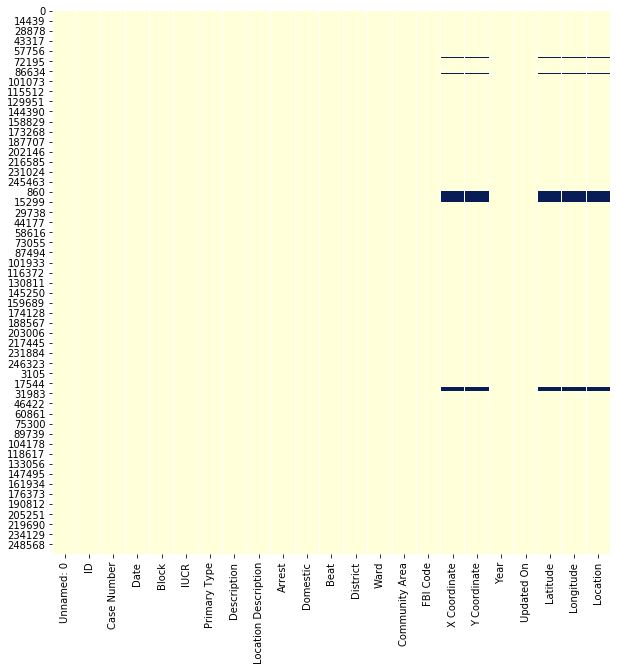

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [0]:
chicago_df.drop(['Unnamed: 0','Case Number', 'ID', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Year', 'FBI Code', 'Beat', 'Ward', 'Community Area', 'Location', 'District', 'Latitude', 'Longitude'], inplace = True, axis = 1)

In [9]:
chicago_df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False


In [0]:
chicago_df.Date=pd.to_datetime(chicago_df.Date,format='%m/%d/%Y %I:%M:%S %p', errors = 'coerce')

In [0]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [0]:
order_data = chicago_df['Primary Type'].value_counts()

In [0]:
order_data = chicago_df['Primary Type'].value_counts().iloc[:15].index

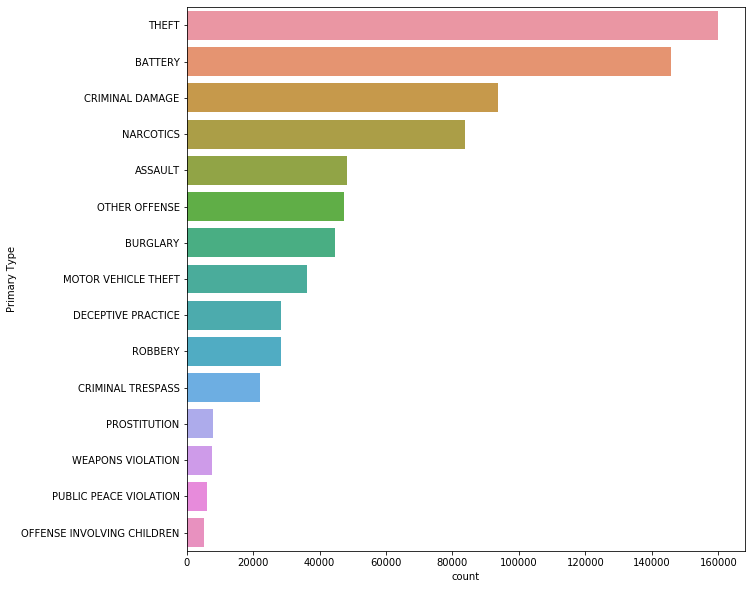

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(y ='Primary Type', data = chicago_df, order = order_data)

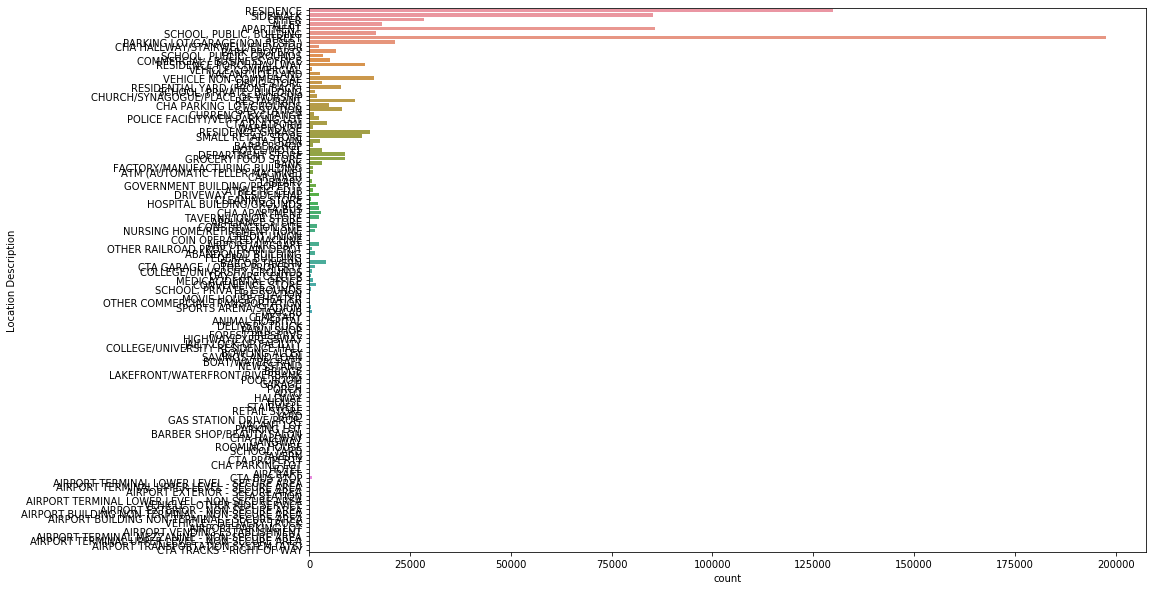

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(y = 'Location Description', data = chicago_df)

In [16]:
chicago_df.resample('Y').size()

Date
2005-12-31      1735
2006-12-31    257303
2007-12-31         4
2008-12-31    249406
2009-12-31      6222
2010-12-31      1493
2011-12-31       535
2012-12-31    186389
2013-12-31      1946
2014-12-31      4151
2015-12-31     47454
2016-12-31     23040
dtype: int64

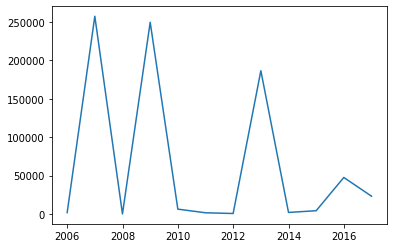

In [17]:
plt.plot(chicago_df.resample('Y').size())

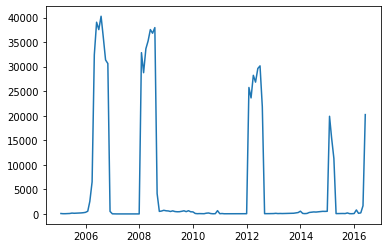

In [18]:
plt.plot(chicago_df.resample('M').size())

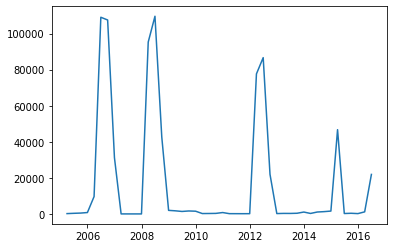

In [19]:
plt.plot(chicago_df.resample('Q').size())

In [0]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [0]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [0]:
chicago_prophet_df_final=chicago_prophet.rename(columns = {'Date':'ds','Crime Count':'y'})

In [23]:
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [25]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,8669.735797,-4721.785693,23620.035259,8669.735797,8669.735797,330.213038,330.213038,330.213038,330.213038,330.213038,330.213038,0.0,0.0,0.0,8999.948835
1,2005-02-28,8627.703552,-5425.006658,23761.497052,8627.703552,8627.703552,213.252929,213.252929,213.252929,213.252929,213.252929,213.252929,0.0,0.0,0.0,8840.956481
2,2005-03-31,8581.167852,-4739.672298,22952.820739,8581.167852,8581.167852,943.615120,943.615120,943.615120,943.615120,943.615120,943.615120,0.0,0.0,0.0,9524.782972
3,2005-04-30,8536.133304,-2870.882579,25688.626380,8536.133304,8536.133304,2303.876763,2303.876763,2303.876763,2303.876763,2303.876763,2303.876763,0.0,0.0,0.0,10840.010067
4,2005-05-31,8489.597604,-95.103009,27222.021529,8489.597604,8489.597604,4929.963661,4929.963661,4929.963661,4929.963661,4929.963661,4929.963661,0.0,0.0,0.0,13419.561265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2017-05-27,1915.327969,-7169.370957,20675.249752,1915.323993,1915.332018,4247.289370,4247.289370,4247.289370,4247.289370,4247.289370,4247.289370,0.0,0.0,0.0,6162.617338
498,2017-05-28,1913.826589,-7050.908736,21340.061931,1913.822602,1913.830650,4437.608827,4437.608827,4437.608827,4437.608827,4437.608827,4437.608827,0.0,0.0,0.0,6351.435416
499,2017-05-29,1912.325209,-7669.396133,20422.881478,1912.321192,1912.329284,4615.847008,4615.847008,4615.847008,4615.847008,4615.847008,4615.847008,0.0,0.0,0.0,6528.172217
500,2017-05-30,1910.823830,-8406.656552,21324.141985,1910.819780,1910.827926,4780.425804,4780.425804,4780.425804,4780.425804,4780.425804,4780.425804,0.0,0.0,0.0,6691.249634


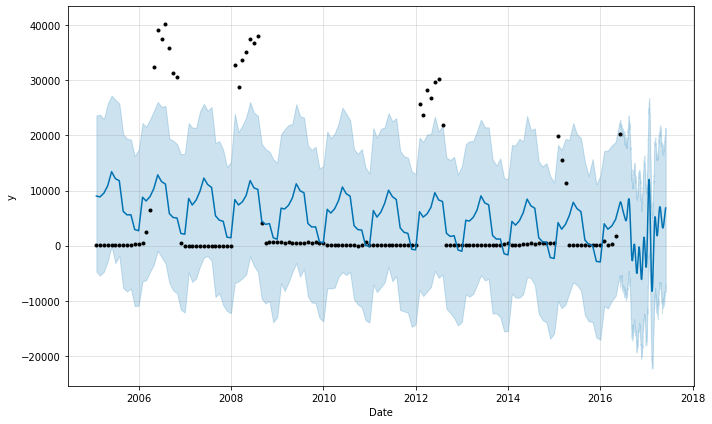

In [26]:
figure = m.plot(forecast,xlabel = 'Date')